# COMPAS Analysis
*Isa de Luis*

## Imports
Import in any dependencies needed for this assignment and load the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

compas_data = pd.read_csv("compas-scores-two-years.csv")

Display the data to ensure it has been loaded properly. 

In [3]:
display(compas_data)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


## Part A
*Make two histograms: one with the decile scores for white defendants ('Caucasian'), and one with the decile scores for black defendants ('African-American'). The histograms should allow the reader to understand how the scores for white defendants and the scores for black defendants differ in a fair comparison.*

*Write 1-5 sentences describing what you observe from these histograms.*

Text(0.5, 1.0, 'Decile Scores for White Defendants')

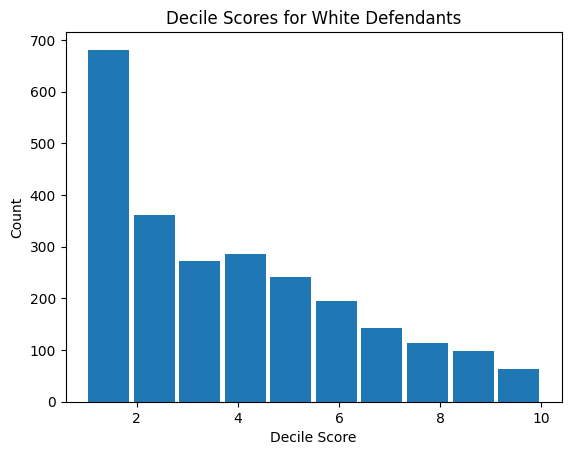

In [4]:
# access the data for caucasian defendants
caucasian_data = compas_data.loc[compas_data["race"] == "Caucasian"]

# access the decile scores
caucasian_decile = caucasian_data["decile_score"]

# plot the histogram
plt.figure(1)
plt.hist(caucasian_decile, rwidth = 0.9)
plt.xlabel("Decile Score")
plt.ylabel("Count")
plt.title("Decile Scores for White Defendants")

3696


Text(0.5, 1.0, 'Decile Scores for Black Defendants')

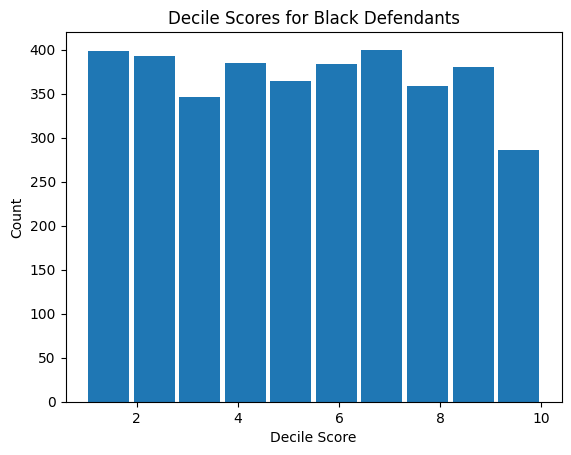

In [5]:
# access the data for african american defendants
african_american_data = compas_data.loc[compas_data["race"] == "African-American"]
print(len(african_american_data))
# access the decile scores
african_american_decile = african_american_data["decile_score"]

# plot the histogram
plt.figure(2)
plt.hist(african_american_decile, rwidth = 0.9)
plt.xlabel("Decile Score")
plt.ylabel("Count")
plt.title("Decile Scores for Black Defendants")

The first thing I noticed about these histograms was that the decile scores for white defendants skews towards the lower numbers while the black defendants decile scores are more evenly distributed. Also in general, it seems like there are a lot more data points for black defendants than white defendants, which may be a result of the prison systems' racism. 

## Part B
*Suppose that defendants with scores that are greater than or equal to 5 are considered to be “high-risk,” and other defendants are considered to be“low-risk.”*

*Compute the false positive rate, the false negative rate, and the correct classification rate for: 1) the entire population, 2) for the population of white defendants separately, and 3) for the population of black defendants separately.*

*Explain these results and interpret what this may mean for different subgroups.* 

*To obtain the context for the potential informativeness of the scores, compute the overall recidivism rate in the dataset. Comment on the difference between the overall recidivism rate and the correct classification rate using the score. Use is_recid as the variable that indicates whether the person recidivated (actually, was re-arrested).*

In [6]:
# some fun little functions we already wrote in class 
def calculate_confusion_matrix(predictions, gt_labels, num_classes):
    confusion_matrix = [[0 for _ in range(num_classes)] for _ in range(num_classes)]

    for pred, true in zip(predictions, gt_labels):
        confusion_matrix[true][pred] += 1
    return confusion_matrix


def calculate_confusion_matrix_details(confusion_matrix):
    
    num_classes = len(confusion_matrix)
    details = defaultdict(dict)
    
    for i in range(num_classes):

        
        TP = confusion_matrix[i][i]
        FP = sum(confusion_matrix[j][i] for j in range(num_classes)) - TP
        FN = sum(confusion_matrix[i][j] for j in range(num_classes)) - TP
        TN = sum(sum(confusion_matrix[j][k] for k in range(num_classes) if k != i) for j in range(num_classes) if j != i)

        details[i]['TP'] = TP
        details[i]['FP'] = FP
        details[i]['FN'] = FN
        details[i]['TN'] = TN

    # Return the dictionary containing detailed metrics for each class
    return details
        

[[2566, 1177], [1331, 2140]]


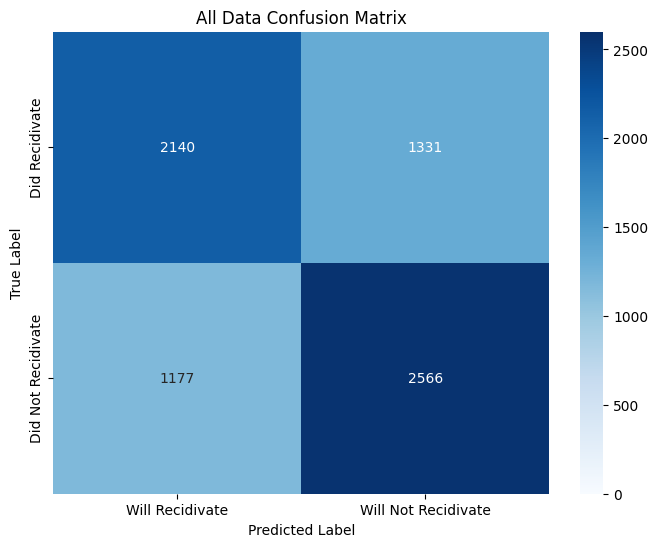

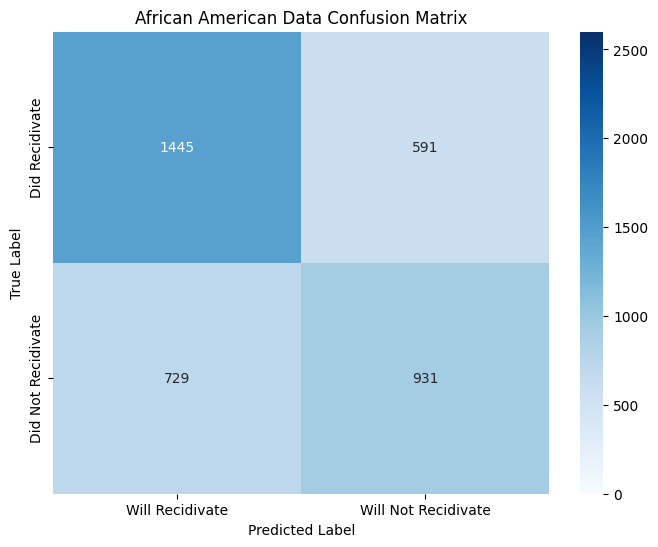

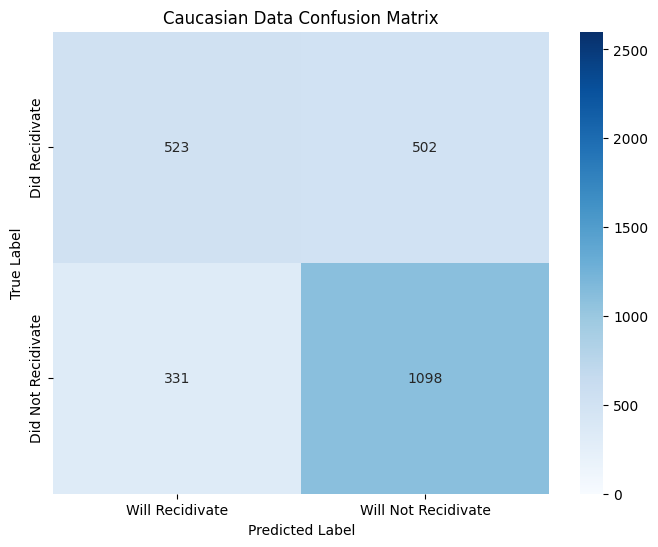

All FPR = 31.445364680737377 %
All FNR = 38.346297896859696 %
All CCR = 65.23426670363183 %

African American FPR = 43.915662650602414 %
African American FNR = 29.027504911591357 %
African American CCR = 64.28571428571429 %

Caucasian FPR = 23.163051084674596 %
Caucasian FNR = 48.97560975609756 %
Caucasian CCR = 66.05541972290139 %

Overall Recidivism Rate = 48.11477682284447 %


In [9]:
# Step 1: Create a confusion matrix for each category

# 2 classes: positive (recidivism) and negative (no recidivism)

# get all decile scores 
all_decile = compas_data["decile_score"]

# get preds -- if the decile score > 5, they are likely to recidivate, if 
# less than 5, they are unlikely to recidivate
# so if score >= 5 then pred == 1, else pred == 0
all_predictions = []
african_american_preds = []
caucasian_preds = []

for score in all_decile:
    if score >= 5:
        all_predictions.append(1)
    else:
        all_predictions.append(0)

for score in african_american_decile:
    if score >= 5:
        african_american_preds.append(1)
    else:
        african_american_preds.append(0)

for score in caucasian_decile:
    if score >= 5:
        caucasian_preds.append(1)
    else:
        caucasian_preds.append(0)

# get the ground truths for each category
all_gt = compas_data["is_recid"].to_list()
african_american_gt = african_american_data["is_recid"].to_list()
caucasian_gt = caucasian_data["is_recid"].to_list()

# calculate confusion matrix
all_confusion_matrix = calculate_confusion_matrix(all_predictions, all_gt, 2)
african_american_cm = calculate_confusion_matrix(african_american_preds, 
                                                 african_american_gt, 2)
caucasian_cm = calculate_confusion_matrix(caucasian_preds, caucasian_gt, 2)
print(all_confusion_matrix)
# graph the confusion matrices to make sure everything makes sense

plt.figure(3, figsize=(8, 6))
sns.heatmap(all_confusion_matrix, 
            annot=True, fmt='d', 
            vmin = 0,
            vmax = 2600,
            cmap = 'Blues', 
            xticklabels=["Will Not Recidivate", "Will Recidivate"], 
            yticklabels=["Did Not Recidivate", "Did Recidivate"])
plt.title('All Data Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Inverting the axes to match the label order
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

plt.figure(4, figsize=(8, 6))
sns.heatmap(african_american_cm, 
            annot=True, fmt='d', 
            vmin = 0,
            vmax = 2600,
            cmap = 'Blues',
            xticklabels=["Will Not Recidivate", "Will Recidivate"], 
            yticklabels=["Did Not Recidivate", "Did Recidivate"])
plt.title('African American Data Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Inverting the axes to match the label order
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

plt.figure(5, figsize=(8, 6))
sns.heatmap(caucasian_cm, 
            annot=True, fmt='d', 
            vmin = 0,
            vmax = 2600,
            cmap = 'Blues',
            xticklabels=["Will Not Recidivate", "Will Recidivate"], 
            yticklabels=["Did Not Recidivate", "Did Recidivate"])
plt.title('Caucasian Data Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Inverting the axes to match the label order
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()


# Step 2: Calculate FPR, FNR, CCR
# false positive rate is false positives / (false positive + true negatives)
# false negative rate is false negatives / (true positive + false negative)
# correct classification rate is (true negative + true positive) / total
all_fpr = all_confusion_matrix[0][1] / (all_confusion_matrix[0][1] + all_confusion_matrix[0][0])
all_fnr = all_confusion_matrix[1][0] / (all_confusion_matrix[1][0] + all_confusion_matrix[1][1])
all_ccr = (all_confusion_matrix[0][0] + all_confusion_matrix[1][1]) / len(all_gt)

african_american_fpr = african_american_cm[0][1] / (african_american_cm[0][1] + african_american_cm[0][0])
african_american_fnr = african_american_cm[1][0] / (african_american_cm[1][0] + african_american_cm[1][1])
african_american_ccr = (african_american_cm[0][0] + african_american_cm[1][1]) / len(african_american_gt)

caucasian_fpr = caucasian_cm[0][1] / (caucasian_cm[0][1] + caucasian_cm[0][0])
caucasian_fnr = caucasian_cm[1][0] / (caucasian_cm[1][0] + caucasian_cm[1][1])
caucasian_ccr = (caucasian_cm[0][0] + caucasian_cm[1][1]) / len(caucasian_gt)

# Step 3: Calculate overall recidivism rate
overall_recidivism_rate = all_gt.count(1) / len(all_gt)

# Step 4: Print Calculations
print(f"All FPR = {all_fpr * 100} %")
print(f"All FNR = {all_fnr * 100} %")
print(f"All CCR = {all_ccr * 100} %")
print("")
print(f"African American FPR = {african_american_fpr * 100} %")
print(f"African American FNR = {african_american_fnr * 100} %")
print(f"African American CCR = {african_american_ccr * 100} %")
print("")
print(f"Caucasian FPR = {caucasian_fpr * 100 } %")
print(f"Caucasian FNR = {caucasian_fnr * 100} %")
print(f"Caucasian CCR = {caucasian_ccr * 100} %")
print("")
print(f"Overall Recidivism Rate = {overall_recidivism_rate * 100} %")

For the two subgroups and the overall dataset, the false positive rate, the false negative rate, and the correct classification rate were all calculated. The false positive rate indicates how many people who did not reoffend were predicted to reoffend in a data group. The false negative rate represents the amount of people who reoffended despite being predicted not to offend, and the correct classification rate represents the correct classifications the model made.

In this data, the African Americans subgroup experiences a much higher false positive rate than Caucasia subgroup, meaning that African Americans are more likely to be wrongly classified as likely to reoffend when they wont. Conversely, Caucasians experience a much higher false negativerate, meaning that actual recidivists are more likely to be wrongly predicted as not reoffenders.

The overall recidivism rate of the dataset was close to 48%, indicating that almost half of the people in the dataset were re-arrested within two years of their original offense. The correct classification rate for the data set is around 65%, which is significantly higher than the overall recidivism rate, suggesting that the model is better at making accurate classifications than guessing based on recidivism rate alone. If you predicted that no individual would reoffend, you would only be correct 48% of the time, making the model, which predicts based on other factors, not just the recidivism rate, is more accurate.

## Part C
*For the possible thresholds [0.5, 1, 1.5, 2, 2.5, 3, ..., 9.5], compute the FPR, FNR, and correct classification rate (CCR) for the entire population, for white defendants, and for black defendants. Plot the results. You should produce three plots with three curves each (one plot per demographic group), with the thresholds being on the x-axis.*
*Explain at least one of these plots, noting the relationship between each of the metrics (FPR, FNR, and CCR) and the thresholds.*
*Note what it would mean to set a high or a low threshold.*
*You don't need to comment on this very last consideration for the assessed part, but please consider what it might mean to set a different threshold for subgroups based on race.*

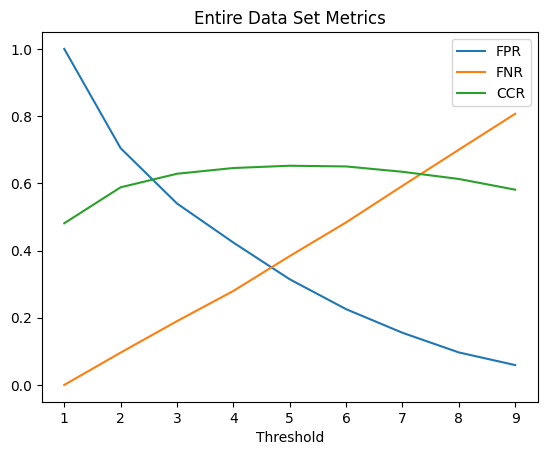

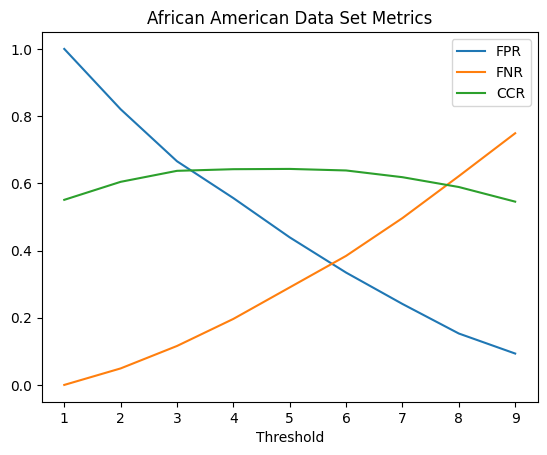

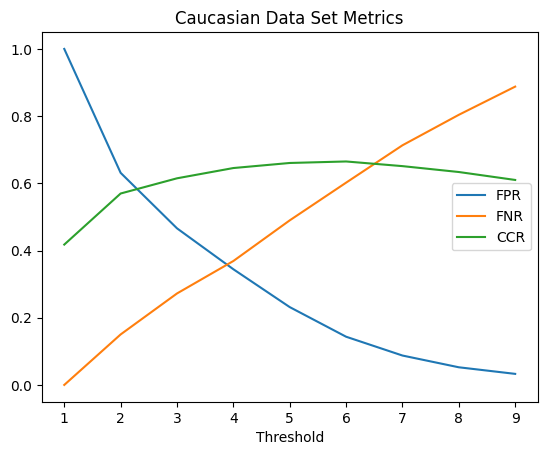

In [30]:
threshold = 0.5

# lists to store calculations
all_fprs = []
all_fnrs = []
all_ccrs = []

african_american_fprs = []
african_american_fnrs = []
african_american_ccrs = []

caucasian_fprs = []
caucasian_fnrs = []
caucasian_ccrs = []

while threshold <= 9:
    all_predictions = []
    african_american_preds = []
    caucasian_preds = []

    # set prediction matricies based on threshold
    for score in all_decile:
        if score >= threshold:
            all_predictions.append(1)
        else:
            all_predictions.append(0)

    for score in african_american_decile:
        if score >= threshold:
            african_american_preds.append(1)
        else:
            african_american_preds.append(0)

    for score in caucasian_decile:
        if score >= threshold:
            caucasian_preds.append(1)
        else:
            caucasian_preds.append(0)

    # ground truths will be the same as the prior step
    # calculate confusion matrix
    all_confusion_matrix = calculate_confusion_matrix(all_predictions, all_gt, 2)
    african_american_cm = calculate_confusion_matrix(african_american_preds, 
                                                    african_american_gt, 2)
    caucasian_cm = calculate_confusion_matrix(caucasian_preds, caucasian_gt, 2)
 
    # Calculate FPR, FNR, CCR
    # false positive rate is false positives / (false positive + true negatives)
    # false negative rate is false negatives / (true positive + false negative)
    # correct classification rate is (true negative + true positive) / total
    all_fpr = all_confusion_matrix[0][1] / (all_confusion_matrix[0][1] + all_confusion_matrix[0][0])
    all_fnr = all_confusion_matrix[1][0] / (all_confusion_matrix[1][0] + all_confusion_matrix[1][1])
    all_ccr = (all_confusion_matrix[0][0] + all_confusion_matrix[1][1]) / len(all_gt)

    african_american_fpr = african_american_cm[0][1] / (african_american_cm[0][1] + african_american_cm[0][0])
    african_american_fnr = african_american_cm[1][0] / (african_american_cm[1][0] + african_american_cm[1][1])
    african_american_ccr = (african_american_cm[0][0] + african_american_cm[1][1]) / len(african_american_gt)

    caucasian_fpr = caucasian_cm[0][1] / (caucasian_cm[0][1] + caucasian_cm[0][0])
    caucasian_fnr = caucasian_cm[1][0] / (caucasian_cm[1][0] + caucasian_cm[1][1])
    caucasian_ccr = (caucasian_cm[0][0] + caucasian_cm[1][1]) / len(caucasian_gt)

    # add values to lists to plot later
    all_fprs.append(all_fpr)
    all_fnrs.append(all_fnr)
    all_ccrs.append(all_ccr)

    african_american_fprs.append(african_american_fpr)
    african_american_fnrs.append(african_american_fnr)
    african_american_ccrs.append(african_american_ccr)

    caucasian_fprs.append(caucasian_fpr)
    caucasian_fnrs.append(caucasian_fnr)
    caucasian_ccrs.append(caucasian_ccr)

    # inc threshold
    threshold += 1

# plot
plt.figure(6)
plt.plot(range(1, 10), all_fprs, label = "FPR")
plt.plot(range(1, 10), all_fnrs, label = "FNR")
plt.plot(range(1, 10), all_ccrs, label = "CCR")
plt.xlabel("Threshold")
plt.title("Entire Data Set Metrics")
plt.legend()
plt.show()

plt.figure(7)
plt.plot(range(1, 10), african_american_fprs, label = "FPR")
plt.plot(range(1, 10), african_american_fnrs, label = "FNR")
plt.plot(range(1, 10), african_american_ccrs, label = "CCR")
plt.xlabel("Threshold")
plt.title("African American Data Set Metrics")
plt.legend()
plt.show()

plt.figure(8)
plt.plot(range(1, 10), caucasian_fprs, label = "FPR")
plt.plot(range(1, 10), caucasian_fnrs, label = "FNR")
plt.plot(range(1, 10), caucasian_ccrs, label = "CCR")
plt.xlabel("Threshold")
plt.title("Caucasian Data Set Metrics")
plt.legend()
plt.show()

It looks like FNR and FPR have an inversely proportional relationship -- as FPR gets smaller, FNR gets larger. It seems like the correct classification rate peaks at a threshold of around 5 and it doesn't seem to get much higher than 0.6, for any of the plots. Setting a lower threshold seems to increase the false positive rate, which makes sense, because suddenly a lot of people who were given a low decile score are being predicted to recividate, even if the odds of them recidivating are rather low, which is why the got the low score in the first place. Setting a higher threshold, on the other hands, has the opposite effect, decreasing the false positive rate, but increasing the false negative rate, because a lot of people who were given a high decile socre are being predicted to not recividate, even though they are more likely to.